In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
weather_t = pd.read_csv("data/weather_data/weather_exceptional_months_perc.csv")
price_data = pd.read_csv("rangedata_commodities_monthly_outlier_counts.csv")

In [ ]:
print(weather_t["YEAR"].max())
print(weather_t["YEAR"].min())
print(price_data["YEAR"].max())
print(price_data["YEAR"].min())  
weather_t = weather_t[weather_t['YEAR']<=2017]
weather_t.head(1000)

2017
1992


,YEAR,MONTH,colder,hotter,wetter,drier
0,1992,1,0.176533,0.371571,0.256202,0.000000
1,1992,2,0.072567,0.400601,0.237913,0.000000
2,1992,3,0.238459,0.329808,0.296457,0.000000
3,1992,4,0.273102,0.273853,0.256096,0.615064
4,1992,5,0.325291,0.308441,0.152572,0.793783
...,...,...,...,...,...,...
295,2017,8,0.285810,0.018315,0.215055,0.000000
296,2017,9,0.213762,0.342861,0.139510,0.000000
297,2017,10,0.201083,0.371374,0.278031,0.000000
298,2017,11,0.264359,0.239279,0.189562,0.000000


In [49]:
price_data.head(10)

,Unnamed: 0,Total_Outliers,Positive_Outliers,Negative_Outliers
0,1992-02-01,1,0.0,1.0
1,1992-03-01,1,0.0,1.0
2,1992-06-01,1,0.0,1.0
3,1992-07-01,4,3.0,1.0
4,1992-08-01,3,0.0,3.0
5,1992-09-01,4,1.0,3.0
6,1992-11-01,1,1.0,0.0
7,1992-12-01,1,1.0,0.0
8,1993-07-01,6,4.0,2.0
9,1993-08-01,2,0.0,2.0


In [50]:
price = price_data.copy()

price['DATE'] = pd.to_datetime(price['Unnamed: 0'])
price['YEAR'] = price['DATE'].dt.year
price['MONTH'] = price['DATE'].dt.month

price = price[["YEAR","MONTH","Positive_Outliers","Negative_Outliers"]]
print(price["YEAR"].max())
print(price["YEAR"].min())              
price.head()



2017
1992


,YEAR,MONTH,Positive_Outliers,Negative_Outliers
0,1992,2,0.0,1.0
1,1992,3,0.0,1.0
2,1992,6,0.0,1.0
3,1992,7,3.0,1.0
4,1992,8,0.0,3.0


In [74]:
all_months = pd.DataFrame([
    {'YEAR': year, 'MONTH': month}
    for year in range(price["YEAR"].min(), price["YEAR"].max())
    for month in range(1, 13)
])

prices = pd.merge(all_months, price, on=['YEAR', 'MONTH'], how='left')
prices['positive'] = prices['Positive_Outliers'].fillna(0).astype(int)
prices['negative'] = prices['Negative_Outliers'].fillna(0).astype(int)

# Fill other missing columns if needed
prices = prices.fillna(0)

# Sort by YEAR and MONTH
prices = prices.sort_values(by=['YEAR', 'MONTH']).reset_index(drop=True)
prices = prices[['YEAR','MONTH',"positive","negative"]]
prices['LABEL'] = np.where(prices['MONTH'] == 1, prices['YEAR'].astype(str), "")
prices['DATE'] = prices['MONTH'].astype(str) + "_" + prices['YEAR'].astype(str)
prices.head(1000)

,YEAR,MONTH,positive,negative,LABEL,DATE
0,1992,1,0,0,1992,1_1992
1,1992,2,0,1,,2_1992
2,1992,3,0,1,,3_1992
3,1992,4,0,0,,4_1992
4,1992,5,0,0,,5_1992
...,...,...,...,...,...,...
295,2016,8,2,0,,8_2016
296,2016,9,0,1,,9_2016
297,2016,10,0,0,,10_2016
298,2016,11,1,0,,11_2016


In [52]:
weather = pd.merge(all_months, weather_t, on=['YEAR', 'MONTH'], how='left')
weather['wetter'] = weather['wetter'].fillna(0).astype(float)
weather['drier'] = weather['drier'].fillna(0).astype(float)
weather['hotter'] = weather['hotter'].fillna(0).astype(float)
weather['colder'] = weather['colder'].fillna(0).astype(float)
weather = weather.fillna(0)
weather = weather.sort_values(by=['YEAR', 'MONTH']).reset_index(drop=True)
weather['LABEL'] = np.where(weather['MONTH'] == 1, weather['YEAR'].astype(str), "")
weather['DATE'] = weather['MONTH'].astype(str) + "_" + weather['YEAR'].astype(str)
weather.head(20)

,YEAR,MONTH,colder,hotter,wetter,drier,LABEL,DATE
0,1992,1,0.176533,0.371571,0.256202,0.000000,1992,1_1992
1,1992,2,0.072567,0.400601,0.237913,0.000000,,2_1992
2,1992,3,0.238459,0.329808,0.296457,0.000000,,3_1992
3,1992,4,0.273102,0.273853,0.256096,0.615064,,4_1992
4,1992,5,0.325291,0.308441,0.152572,0.793783,,5_1992
5,1992,6,0.336126,0.075454,0.168796,0.777368,,6_1992
6,1992,7,0.262434,0.032995,0.353211,0.550620,,7_1992
7,1992,8,0.446684,0.024063,0.172916,0.000000,,8_1992
8,1992,9,0.357415,0.124880,0.288312,0.000000,,9_1992
9,1992,10,0.288879,0.303285,0.142160,0.000000,,10_1992


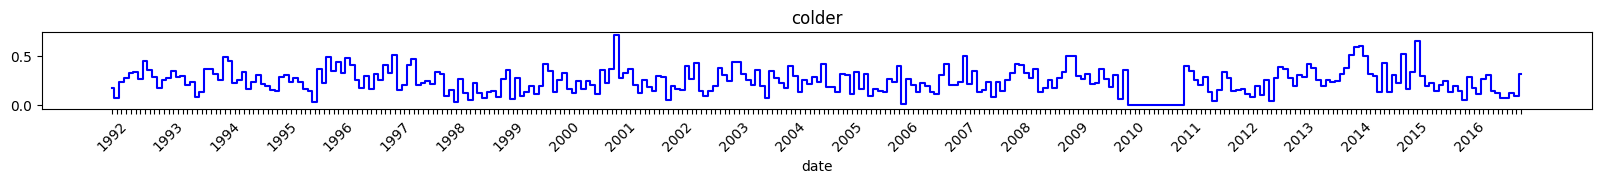

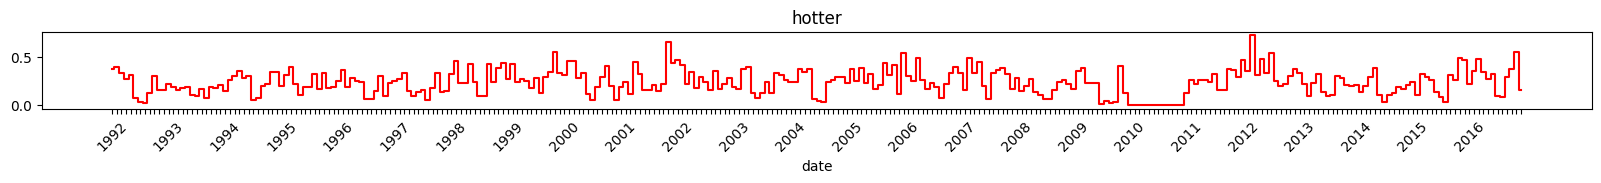

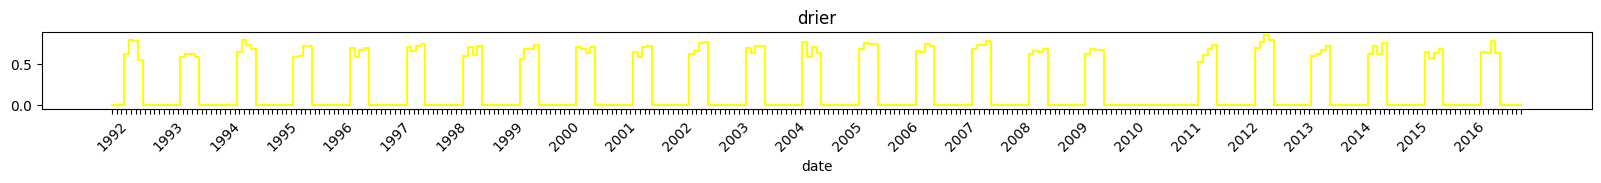

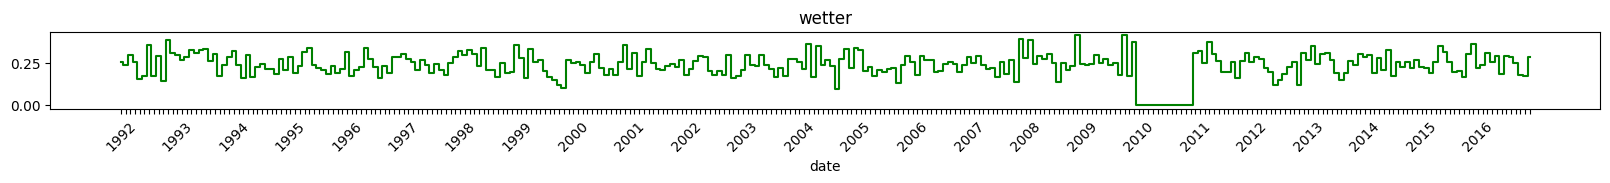

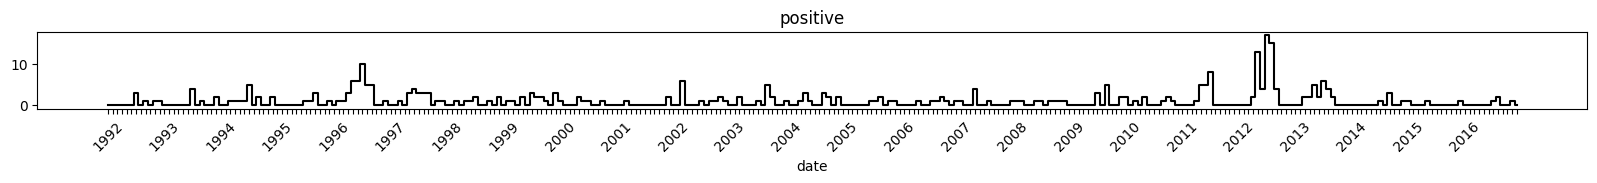

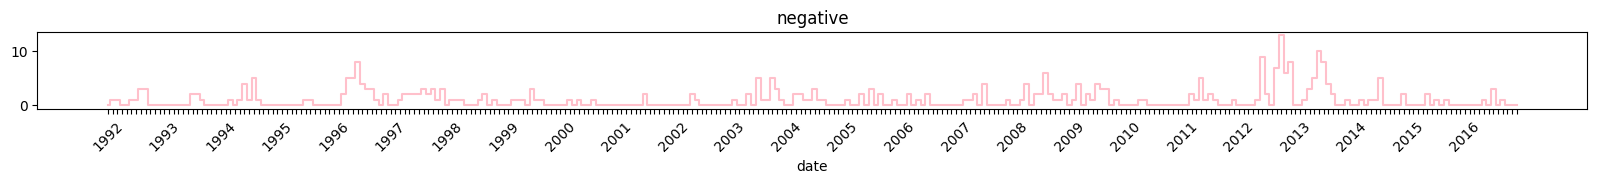

In [53]:
plt.figure(figsize=(20, 1))
plt.step(weather["DATE"], weather["colder"], where='mid', color='blue')
plt.xlabel("date")
plt.title("colder")
plt.xticks(ticks=range(len(weather['DATE'])), labels=weather['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(weather["DATE"], weather["hotter"], where='mid', color='red')
plt.xlabel("date")
plt.title("hotter")
plt.xticks(ticks=range(len(weather['DATE'])), labels=weather['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(weather["DATE"], weather["drier"], where='mid', color='yellow')
plt.xlabel("date")
plt.title("drier")
plt.xticks(ticks=range(len(weather['DATE'])), labels=weather['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(weather["DATE"], weather["wetter"], where='mid', color='green')
plt.xlabel("date")
plt.title("wetter")
plt.xticks(ticks=range(len(weather['DATE'])), labels=weather['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(prices["DATE"], prices["positive"], where='mid', color='black')
plt.xlabel("date")
plt.title("positive")
plt.xticks(ticks=range(len(prices['DATE'])), labels=prices['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 1))
plt.step(prices["DATE"], prices["negative"], where='mid', color='pink')
plt.xlabel("date")
plt.title("negative")
plt.xticks(ticks=range(len(prices['DATE'])), labels=prices['LABEL'], rotation=45)
plt.show()


In [69]:
from sklearn.linear_model import LinearRegression
modelP = LinearRegression()
modelN = LinearRegression()
Xt = weather[weather_t['YEAR']<2005][['hotter', 'colder', 'wetter', 'drier',"MONTH"]]
yP = prices[prices['YEAR']<2005]['positive']
yN = prices[prices['YEAR']<2005]['negative']
X = weather
X = weather[['hotter', 'colder', 'wetter', 'drier',"MONTH"]]
modelP.fit(Xt, yP)
modelN.fit(Xt, yN)

positive_predictions = (modelP.predict(X)).astype(int)
negative_predictions = (modelN.predict(X)).astype(int)
#thresholdP = (positive_predictions.max() - positive_predictions.min())/2
#thresholdN = (negative_predictions.max() - negative_predictions.min())/2
#positive_predictions = (positive_predictions >= thresholdP).astype(int)
#negative_predictions = (negative_predictions >= thresholdN).astype(int)

prediction = pd.DataFrame({
    "positive": positive_predictions,
    "negative": negative_predictions,
    "DATE": prices["DATE"],
    "LABEL": prices["LABEL"],
    "MONTH": prices["MONTH"],
    "YEAR": prices["YEAR"]
})

In [59]:
#prices["positive"] = np.where(prices["positive"]>prediction['positive'].max(),prediction['positive'].max(),prices["positive"])
#prices["negative"] = np.where(prices["negative"]>prediction['negative'].max(),prediction['negative'].max(),prices["negative"])

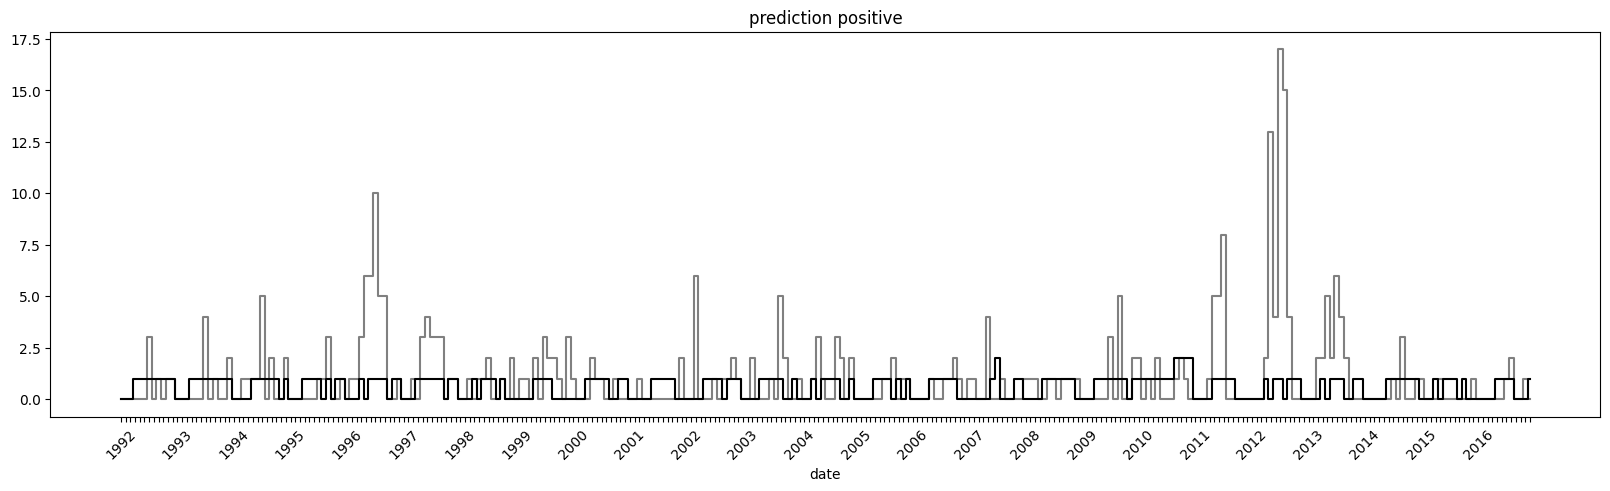

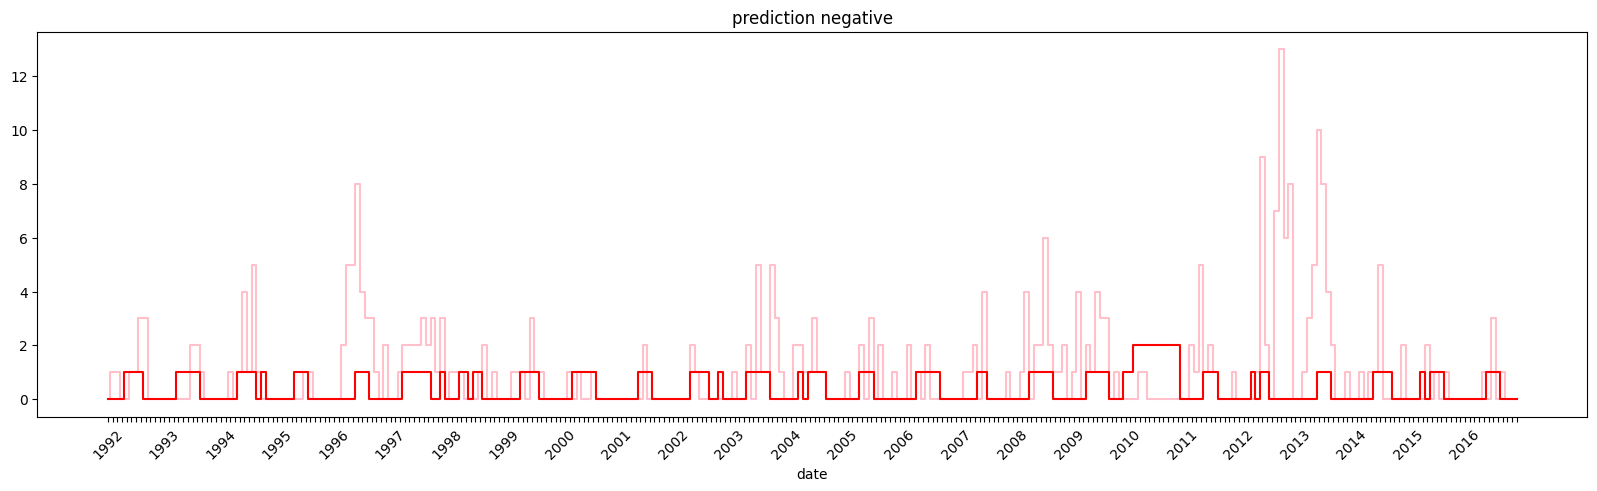

In [71]:
plt.figure(figsize=(20, 5))
plt.step(prices["DATE"], prices["positive"], where='mid', color='grey')
plt.xlabel("date")
plt.title("positive")
plt.xticks(ticks=range(len(prices['DATE'])), labels=prices['LABEL'], rotation=45)

plt.step(prediction["DATE"], prediction["positive"], where='mid', color='black')
plt.xlabel("date")
plt.title("prediction positive")
plt.xticks(ticks=range(len(prediction['DATE'])), labels=prediction['LABEL'], rotation=45)
plt.show()

plt.figure(figsize=(20, 5))
plt.step(prices["DATE"], prices["negative"], where='mid', color='pink')
plt.xlabel("date")
plt.title("negative")
plt.xticks(ticks=range(len(prices['DATE'])), labels=prices['LABEL'], rotation=45)

plt.step(prediction["DATE"], prediction["negative"], where='mid', color='red')
plt.xlabel("date")
plt.title("prediction negative")
plt.xticks(ticks=range(len(prediction['DATE'])), labels=prediction['LABEL'], rotation=45)
plt.show()

In [ ]:
print("Model Coefficients:", modelP.coef_)
print("Model Intercept:", modelP.intercept_)

print("Model Coefficients:", modelN.coef_)
print("Model Intercept:", modelN.intercept_)


Model Coefficients: [-2.34718053 -0.37838252 -1.69264247  0.79031582  0.0660673 ]
Model Intercept: 1.4605610507368443
Model Coefficients: [-2.4741897  -1.11404441 -2.20858493  0.81085396  0.0270733 ]
Model Intercept: 1.9282124106049001
